# MICA2 Basics

## A Brief Introduction to MICA2

MICA2 is a somewhat different algorithm to the others included in pyPetal. Firstly, while the other methods employ MCMC as their sampling algorithm, MICA2 employs diffusive nested sampling (DNS) as their sampling method. Secondly, the method used by MICA2 is more complex in theory and practice than the others. However, this added complexity comes with many positives due to its highly customizable parameterization.

We'll descibe the basics of MICA2 here, but for more detail on anything remotely related to this software, see the [MICA2 documentation](https://mica2.readthedocs.io/en/latest/index.html), the [software repository](https://github.com/LiyrAstroph/MICA2/), or read the [corresponding paper](https://ui.adsabs.harvard.edu/abs/2016ApJ...831..206L/abstract).

In a nutshell, in most reverberation mapping analysis, the goal is to describe the relationship between the input/driving (i.e., continuum) light curve, and the output/driven (i.e., line) light curve. In many circumstances, this relationship can tell us about the physical characteristics of the system. This relationship can be described by the transfer function $\Psi(\tau)$, which is defined as follows:

$$ L(t) = \int \Psi(\tau) C(t - \tau) d\tau$$

where $L(t)$ is the line light curve, and $C(t)$ is the continuum light curve.

MICA2 describes the transfer function as a sum of Gaussians:

$$ \Psi(\tau) = \sum_{k=1}^{K} \frac{f_k}{2\pi \omega_k} \exp\left[  -\frac{(\tau - \tau_k)^2}{2 \omega_k^2} \right] $$

where a given Gaussian $k$ has width $\omega_k$ and center $\tau_k$, for a total of $K$ Gaussians.

In addition, MICA2 can also describe $\Psi(\tau)$ as a sum of tophat functions:

$$ \Psi(\tau) = \sum_{k=1}^{K} \frac{f_k}{2 \omega_k} H(\tau, \tau_k, \omega_k) $$

for the tophat function:

$$ 
\begin{array}{ll}
    H(\tau, \tau_k, \omega_k) & = & 1, & \tau_k - \omega_k \leq \tau \leq \tau_k + \omega_k \\
    & = & 0, & {\rm else}  \\
\end{array}
$$

In all cases, MICA2 will use DNS via [CDNest](https://github.com/LiyrAstroph/CDNest) to optimize the likelihood for a given nuber of Gaussians, which will povide the widths and centers of each Gaussian, and a transfer function.

## MICA2 Module Arguments

There are many different options for the arguments that can be input to the MICA2 module. These include both arguments for MICA2, and for the CDNest sampler. We will list all the options here, and go into a few of the more complex arguments in other examples. These arguments are also identical to the arguments for MICA2, so when in doublt look at the MICA2 documentation.

__MICA2 options__

* ``type_tf``: The type of transfer function to use in MICA2. Can be either ``"gaussian"`` or ``"tophat"``. Default is ``"gaussian"``.

* ``max_num_saves``: The number of saves to do for the DNS sampling. Default is 2000.
* ``flag_uniform_var_params``: Whether each dataset has the same variability parameters (i.e., continuum). Default is ``False``.
* ``flag_uniform_transfuns``: Whether each dataset has the same line parameters. Default is ``False``.
* ``flag_trend``: Whether or not to include a trend in the transfer function. 0 for a constant trend, 1 for a linear trend, 2 for a conic trend. Default is 0.
* ``flag_lag_posivity``: Whether or not to force Gaussians to be located at positive lags. Default is ``False``.
* ``flag_negative_resp``: Whether or not to turn on negative response. Default is ``False``.
* ``number_component``: The lower and upper bounds for the number of Gaussians/tophats to include. Default is ``[1, 1]``.
* ``width_limit``: The lower and upper limits for the width of the Gaussians. If only one value is given, it will be assumed for both limits. If ``None``, these will be determined by MICA2. Default is ``None``.
* ``flag_con_sys_err``: Whether or not to include a constant systematic error in the continuum light curve. Default is ``False``.
* ``flag_line_sys_err``: Whether or not to include a constant systematic error in the line light curve(s). Default is ``False``.
* ``lag_prior``: The type of prior to use for the lags. See the MICA2 documentation. Default is 0.

__pyPetal Options__

* ``together``: Whether or not to fit the time lags of all light curves together, with the same transfer function. Default is ``False``.

* ``no_order``: Whether or not the order of the time lags makes a difference (i.e., whether or not the time lags are allowed to be equal). If order doesn't matter, MICA2 will be able to fit all light curves in one run. If set to ``True``, a separate MICA2 run will be performed for each line. Default is ``True``.

__CDNest Options__

See MICA2/CDNest documentation.

* ``num_particles``: Default is 1.
  
* ``thread_steps_factor``: Default is 1.
* ``new_level_interval_factor``: Default is 1.
* ``save_interval_factor``: Default is 1.
* ``lam``: Default is 10.
* ``beta``: Default is 100.
* ``ptol``: Default is 0.1.
* ``max_num_levels``: Default is 0.


## A Basic Example

.. note: There has been trouble trying to run MICA2 on a Jupyter notebook. We'll put in the code necessary and show the output images.

Here, we'll run MICA2 on a set of the JAVELIN example light curves:

In [ ]:
%matplotlib inline
import pypetal.pipeline as pl

main_dir = 'pypetal/examples/dat/javelin_'
line_names = ['continuum', 'yelm', 'zing']
filenames = [ main_dir + x + '.dat' for x in line_names ]

output_dir = 'mica2_output1/'

In [ ]:
params = {
    'max_num_saves': 2000,
    'type_tf': "gaussian",
    'no_order': True,
    'flag_line_sys_err': True
}

res = pl.run_pipeline(output_dir, filenames, line_names,
                      run_mica2=True, mica2_params=params,
                      verbose=True, plot=True, time_unit='d',
                      file_fmt='ascii', lag_bounds=[-500, 500])

### Output Images

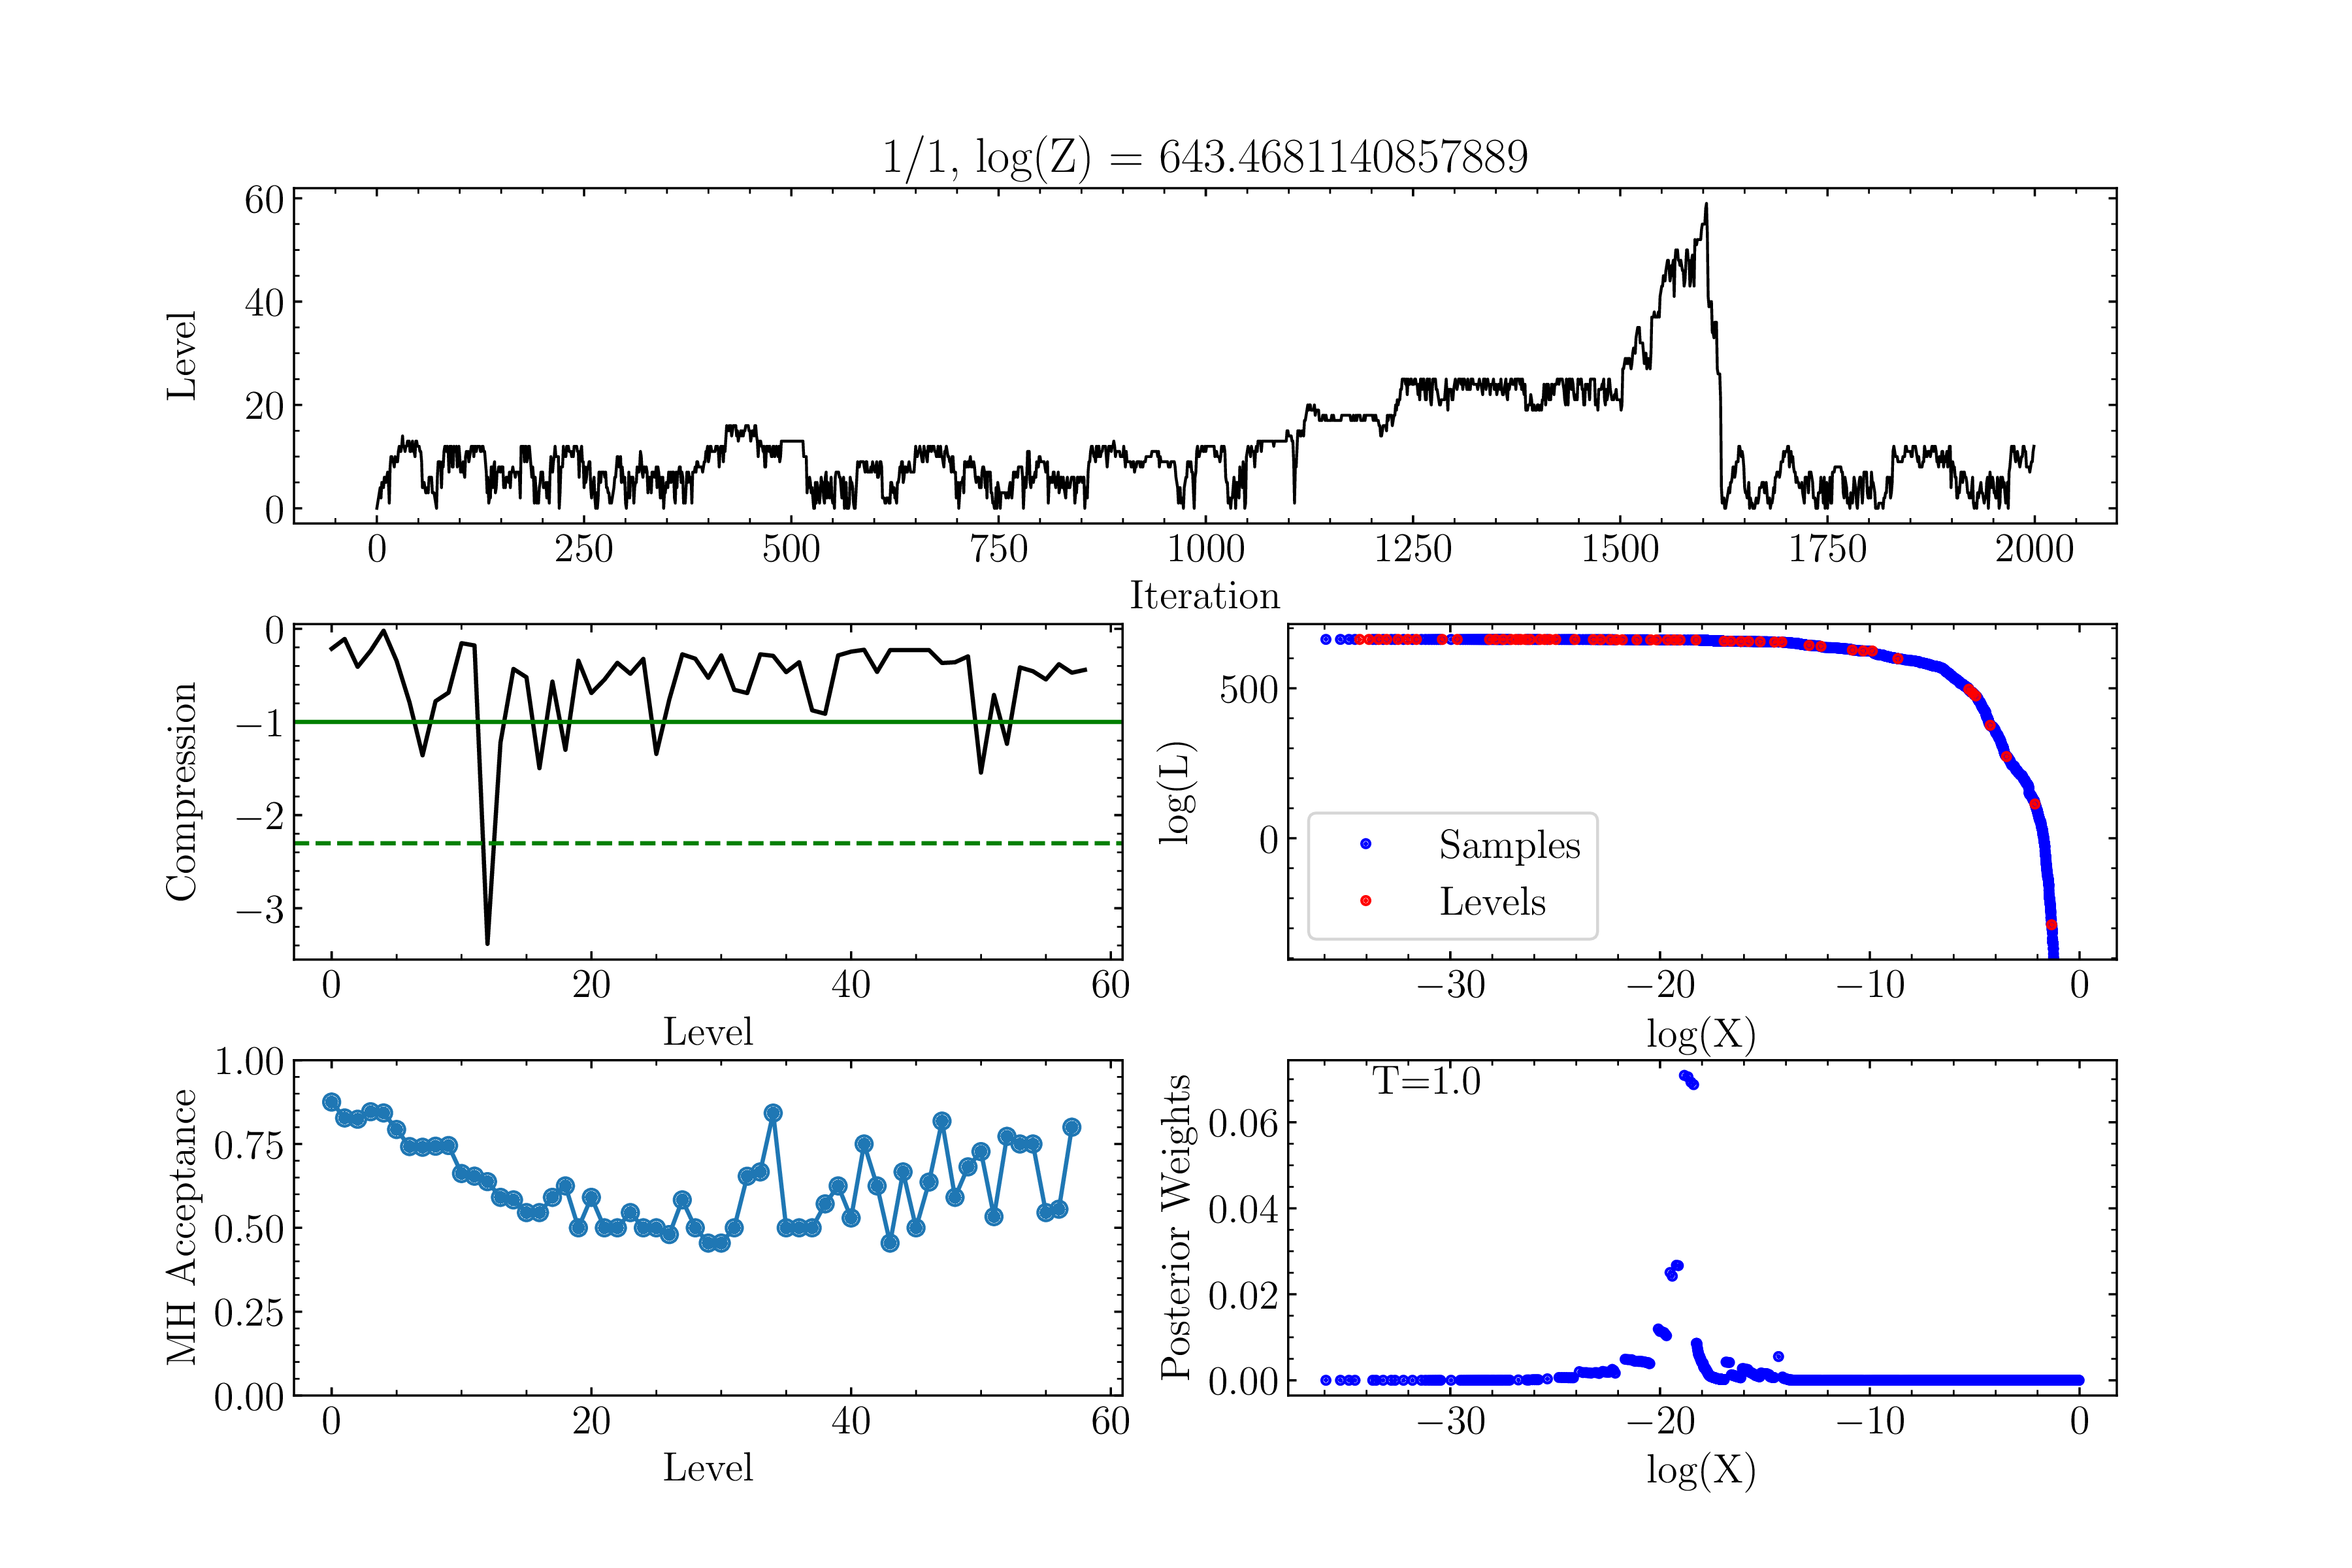

In [7]:
from wand.image import Image as WImage
WImage(filename='mica2_output1/yelm/mica2/data/cdnest_1.pdf', resolution=300)

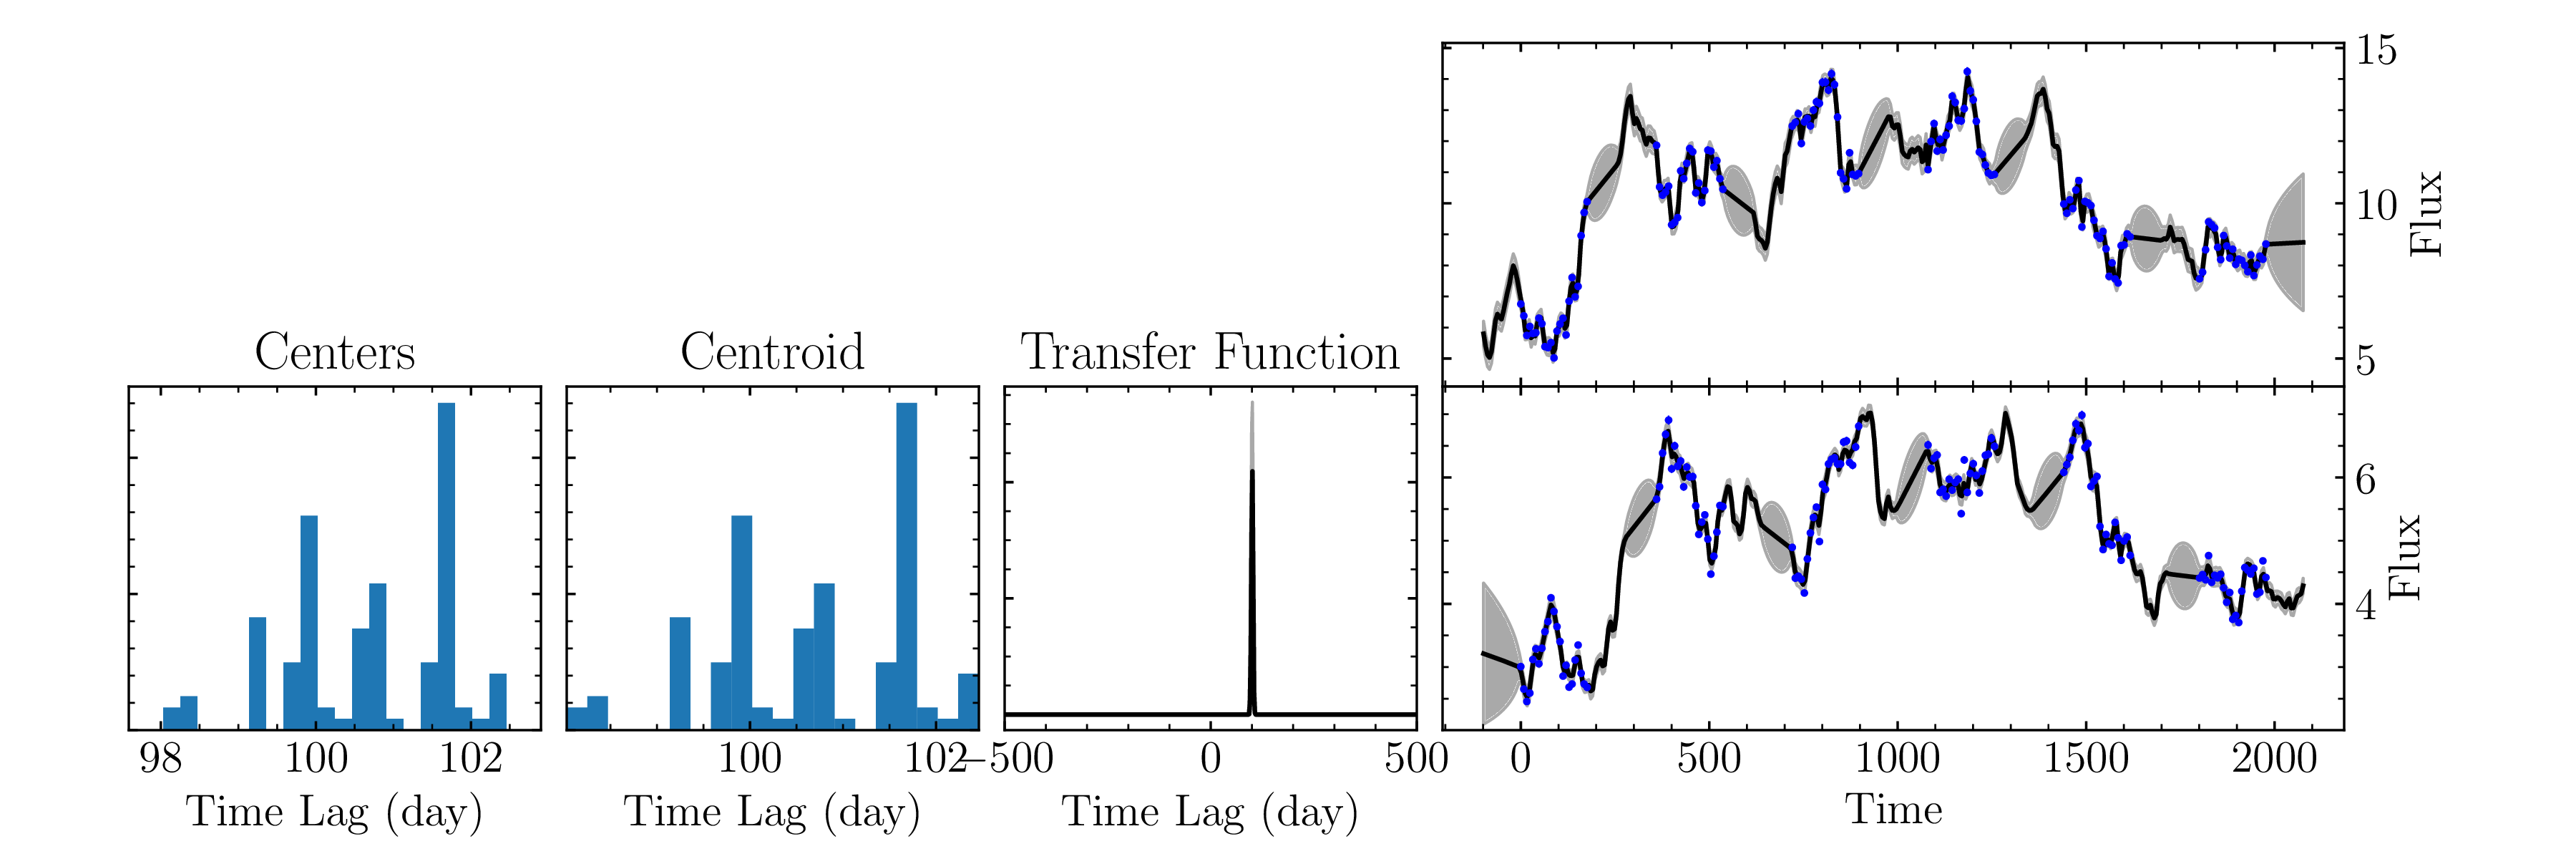

In [8]:
WImage(filename='mica2_output1/yelm/mica2/data/fig_1.pdf', resolution=300)

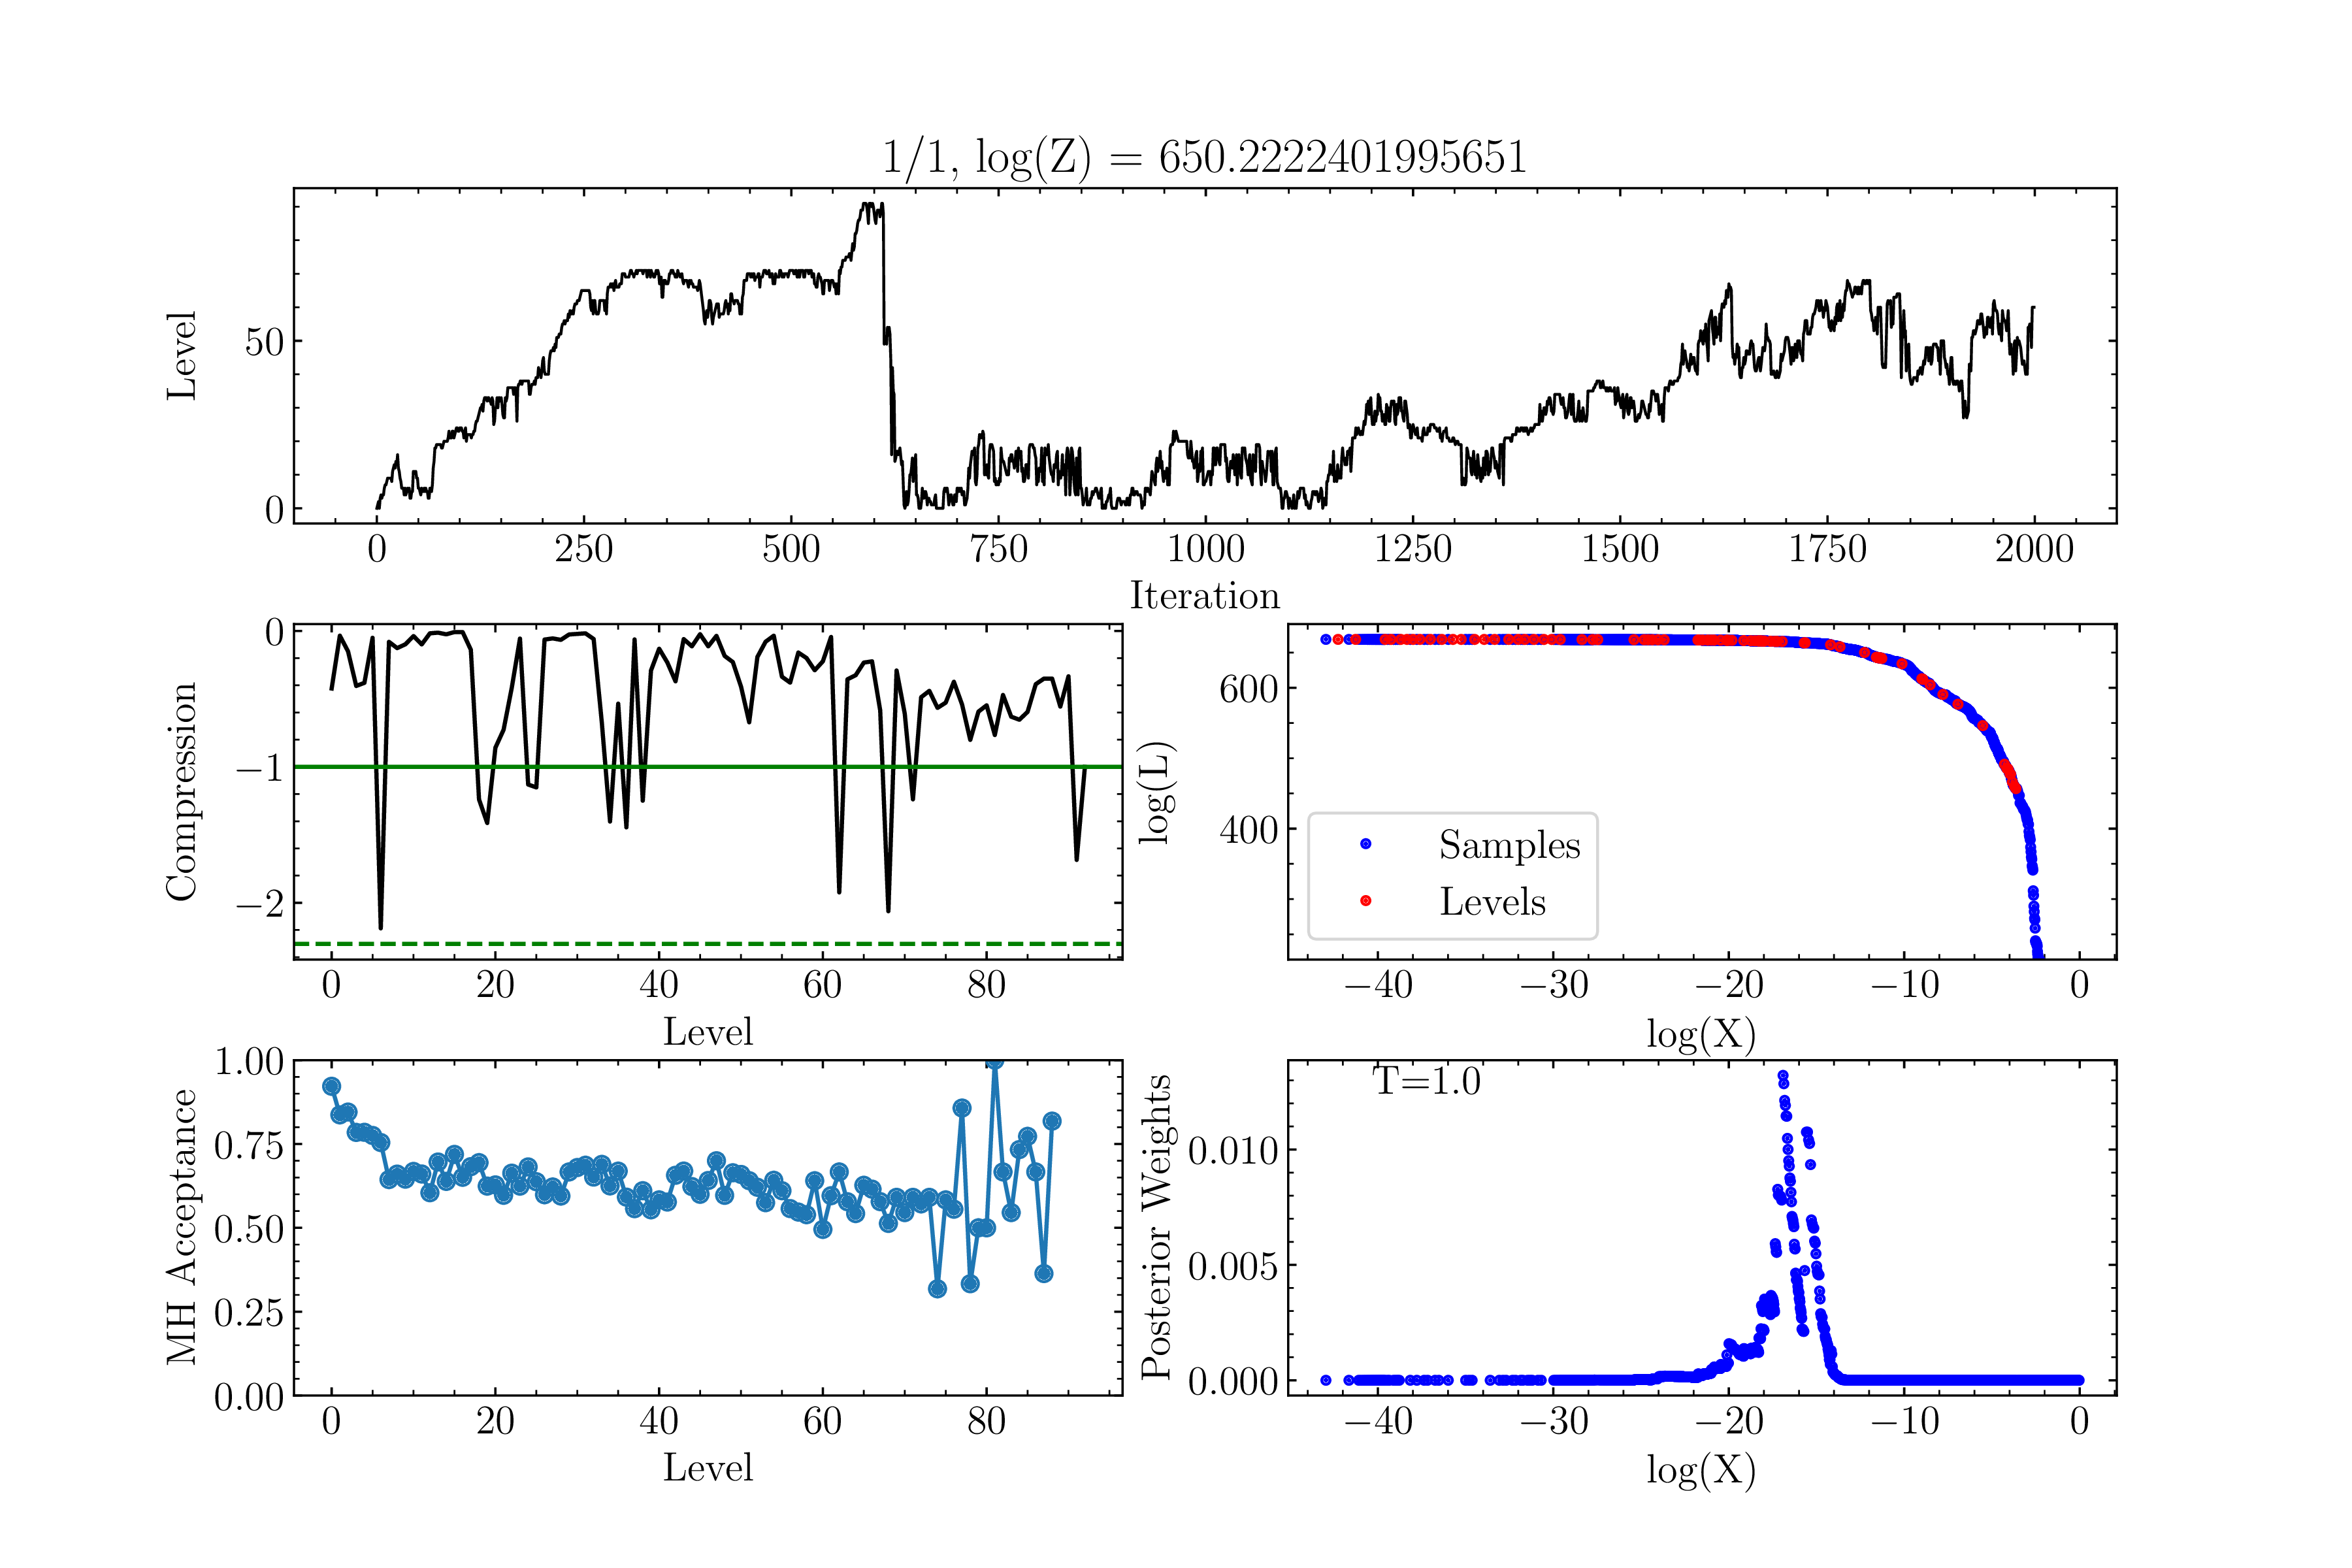

In [9]:
WImage(filename='mica2_output1/zing/mica2/data/cdnest_1.pdf', resolution=300)

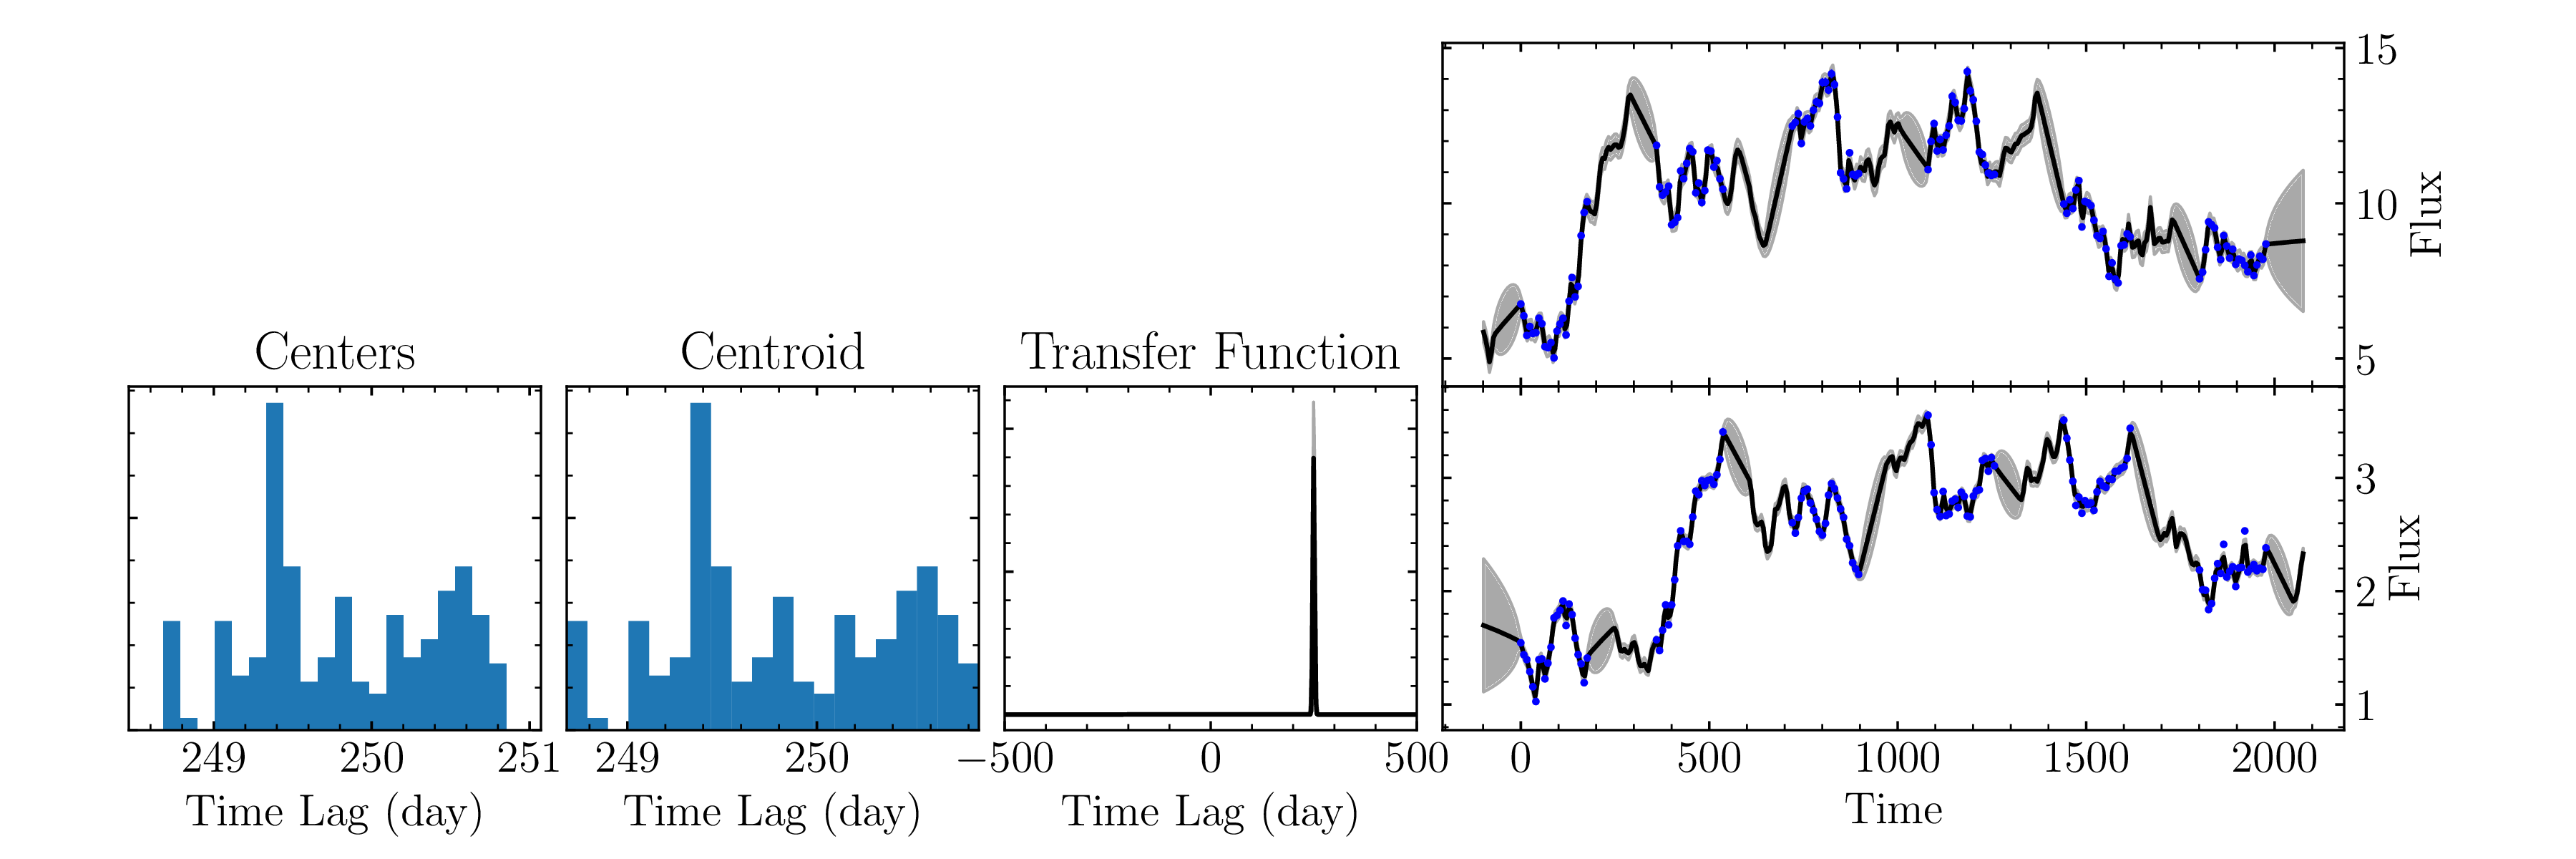

In [10]:
WImage(filename='mica2_output1/zing/mica2/data/fig_1.pdf', resolution=300)

We can see that MICA2 identified a peak near ~[100, 250] days for [yelm, zing], and identified an almost delta-like transfer function between the two (i.e., just a simple shift in the light curve).

## MICA2 Output Files

The MICA2 module has multiple outputs, most of which are not needed by the user but can be useful for diagnostics, especially for the CDNest run. In particular, MICA2 will always produce two directories: ``data/`` and ``param/`` somewhere within the pypetal file structure. Seeing as we've set ``together=False`` in the example run, we'll describe the file output for this case, however, look into the other MICA2 examples to see how the file structure changes for different parameter choices.

When ``together=False`` there will be a ``mica2/`` subdirectory for each line. In addition, when ``no_order=True``, there will be a ``data/`` and ``param/`` directory within this ``mica2/`` subdirectory for each line (seeing as we've done a separate MICA2 run for each line). The ``data/`` directiory will contain output CDNest information, and the ``param/`` directory will contain parameter files that were used for CDNest. 

The names of the file outputs all depend on the number of Gaussians/tophats chosen for MICA2. Many files will be per-Gaussian. In this case, these files will end in an integer, labeling the index of the Gaussian/tophat it belongs to. For example, ``hb_centers_1.dat`` will be the samples for the Gaussian centers for the line ``hb`` and Gaussian index ``1``.

The ``data/`` directory will contain the following figures:

* ``cdnest_{ngauss}.pdf``: A figure showing the quality of the CDNest run, following some post-processing

* ``fig_{ngauss}.pdf``: A figure showing the quality of the fits, including histograms of the Gaussian centers/centroids, the fit light curves, and the transfer function

In addition, the following output files will be located in each line's ``mica2/`` directiory:

* ``{line_name}_centers_{gauss_index}.dat``: The samples for the Gaussian/tophat centers for line ``line_name`` and Gaussian/tophat index ``gauss_index``

* ``{line_name}_centroids_{gauss_index}.dat``: The samples for the Gaussian/tophat centroids for line ``line_name`` and Gaussian/tophat index ``gauss_index``

* ``cont_recon.dat``: The reconstructed continuum light curve

* ``{line_name}_recon.dat``: The reconstructed light curve for line ``line_name``

* ``{line_name}_lag_samples.dat``: The weighted/unweighted lag samples (summed over all Gaussians/tophats) for line ``line_name``

* ``{line_name}_transfunc.dat``: The transfer function for line ``line_name`` and its upper/lower uncertainty

## MICA2 Output

To run the python version of MICA2 requires the creation of a ``pymica.gmodel`` object for each run. This contains all of the information from the run (including the CDNest information), and can be used to create additional figures (see the MICA2 documentation or repository). The MICA2 module will output a list of each of these objects, in the order of the input light curves. 